In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [11]:
c02_df=pd.read_csv('data/global_co2.csv')
c02_df.head()

,Year,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita
0,1751,3,0,0,3,0,0,NaN
1,1752,3,0,0,3,0,0,NaN
2,1753,3,0,0,3,0,0,NaN
3,1754,3,0,0,3,0,0,NaN
4,1755,3,0,0,3,0,0,NaN


In [12]:
temp_df=pd.read_csv('data/annual_temp.csv')
temp_df.head()

,Source,Year,Mean
0,GCAG,2015,0.8990
1,GISTEMP,2015,0.8700
2,GCAG,2014,0.7402
3,GISTEMP,2014,0.7500
4,GCAG,2013,0.6687


In [13]:
c02_df = c02_df.ix[:,:2]                     # Keep only total CO2
c02_df = c02_df.ix[c02_df['Year'] >= 1960]   # Keep only 1960 - 2010
c02_df.columns=['Year','CO2']                # Rename columns
c02_df = c02_df.reset_index(drop=True)       # Reset index
c02_df.head()

/home/akinyalcinkaya/anaconda2/envs/tensorlow/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/home/akinyalcinkaya/anaconda2/envs/tensorlow/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,Year,CO2
0,1960,2569
1,1961,2580
2,1962,2686
3,1963,2833
4,1964,2995


In [14]:
temp_df = temp_df[temp_df.Source != 'GISTEMP']                              # Keep only one source
temp_df.drop('Source', inplace=True, axis=1)                                # Drop name of source
temp_df = temp_df.reindex(index=temp_df.index[::-1])                        # Reset index
temp_df = temp_df.ix[temp_df['Year'] >= 1960].ix[temp_df['Year'] <= 2010]   # Keep only 1960 - 2010
temp_df.columns=['Year','Temperature']                                      # Rename columns
temp_df = temp_df.reset_index(drop=True)                                    # Reset index
temp_df.head()

/home/akinyalcinkaya/anaconda2/envs/tensorlow/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


,Year,Temperature
0,1960,0.0252
1,1961,0.0818
2,1962,0.0924
3,1963,0.1100
4,1964,-0.1461


In [16]:
climate_change_df=pd.concat([c02_df,temp_df.Temperature],axis=1)
climate_change_df.head()

,Year,CO2,Temperature
0,1960,2569,0.0252
1,1961,2580,0.0818
2,1962,2686,0.0924
3,1963,2833,0.1100
4,1964,2995,-0.1461


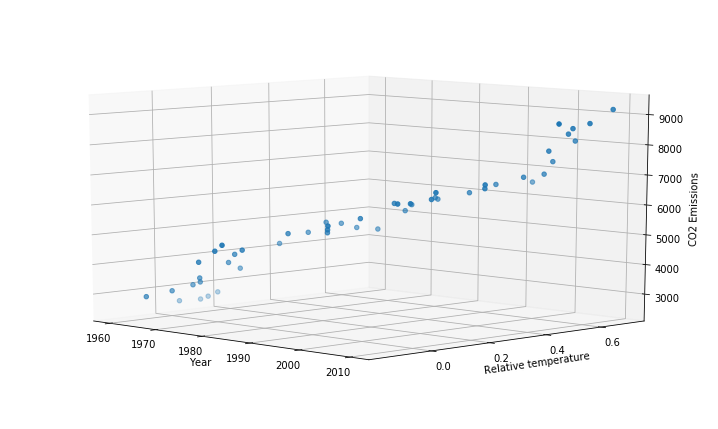

In [17]:
fig=plt.figure()
fig.set_size_inches(12.5,7.5)
ax=fig.add_subplot(111,projection='3d')

ax.scatter(xs=climate_change_df['Year'],ys=climate_change_df['Temperature'],zs=climate_change_df['CO2'])

ax.set_ylabel('Relative temperature');ax.set_xlabel('Year');ax.set_zlabel('CO2 Emissions')

ax.view_init(10,-45)             

Text(0,0.5,u'Relative temperature')

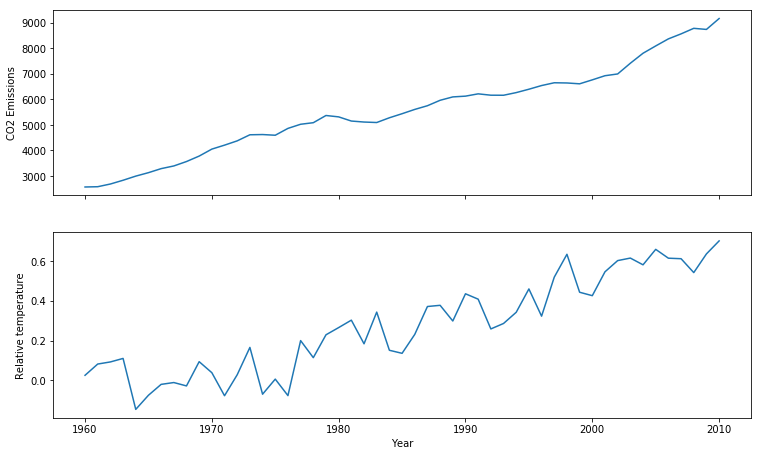

In [18]:
f,axarr=plt.subplots(2,sharex=True)
f.set_size_inches(12.5,7.5)

axarr[0].plot(climate_change_df['Year'],climate_change_df['CO2'])
axarr[0].set_ylabel('CO2 Emissions')
axarr[1].plot(climate_change_df['Year'],climate_change_df['Temperature'])

axarr[1].set_xlabel('Year')
axarr[1].set_ylabel('Relative temperature')

In [19]:
X = climate_change_df.as_matrix(['Year'])
Y = climate_change_df.as_matrix(['CO2', 'Temperature']).astype('float32')

In [20]:
X

array([[1960],
       [1961],
       [1962],
       [1963],
       [1964],
       [1965],
       [1966],
       [1967],
       [1968],
       [1969],
       [1970],
       [1971],
       [1972],
       [1973],
       [1974],
       [1975],
       [1976],
       [1977],
       [1978],
       [1979],
       [1980],
       [1981],
       [1982],
       [1983],
       [1984],
       [1985],
       [1986],
       [1987],
       [1988],
       [1989],
       [1990],
       [1991],
       [1992],
       [1993],
       [1994],
       [1995],
       [1996],
       [1997],
       [1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010]])

In [21]:
X_train, X_test, y_train, y_test = np.asarray(train_test_split(X, Y, test_size=0.1))

In [22]:
reg=LinearRegression()

In [23]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
print('Score:',reg.score(X_test.reshape(-1,1),y_test))

('Score:', 0.96424588231058228)


In [26]:
x_line = np.arange(1960,2011).reshape(-1,1)
p = reg.predict(x_line).T

In [27]:
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(12.5, 7.5)
axarr[0].plot(climate_change_df['Year'], climate_change_df['CO2'])
axarr[0].plot(x_line, p[0])
axarr[0].set_ylabel('CO2 Emissions')
axarr[1].plot(climate_change_df['Year'], climate_change_df['Temperature'])
axarr[1].plot(x_line, p[1])
axarr[1].set_xlabel('Year')
axarr[1].set_ylabel('Relative temperature')x_line = np.arange(1960,2011).reshape(-1,1)
p = reg.predict(x_line).T

SyntaxError: invalid syntax (<ipython-input-27-e11e2baca5e2>, line 9)